## Project - Twitter US Airline Sentiment Analysis


### Data Description

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### Dataset:
The project is from a dataset from Kaggle.
Link to the Kaggle project site:https://www.kaggle.com/crowdflower/twitter-airline-sentiment. 
The dataset has to be downloaded from the above Kaggle website.
The dataset has the following columns:
<ul>
    <li>tweet_id</li>
    <li>airline_sentiment</li>
    <li>airline_sentiment_confidence</li>
    <li>negativereason</li>
    <li>negativereason_confidence</li>
    <li>airline</li>
    <li>airline_sentiment_gold</li>
    <li>name</li>
    <li>negativereason_gold</li>
    <li>retweet_count</li>
    <li>text</li>
    <li>tweet_coord</li>
    <li>tweet_created</li>
    <li>tweet_location</li>
    <li>user_timezone</li>
</ul>

#### Objective 

To implement the techniques learnt as a part of the course.

##### Learning Outcomes:
<ul>
    <li>Basic understanding of text pre-processing.</li>
    <li>What to do after text pre-processing: Bag of words or Tf-idf </li>
    <li>Build the classification model.</li>
    <li>Evaluate the Model.</li>
</ul>

#### 1. Import the necessary packages

In [1]:
# Load Libraries
import numpy as np 
import pandas as pd 
import os as os

import re, string, unicodedata
import pandas as pd
import nltk           
                        # Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import contractions
from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/harinirao/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/harinirao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harinirao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset into dataframe

In [3]:
# Load data
tweet_dataset = pd.read_csv('Tweets.csv')
tweet_dataset.shape

(14640, 15)

In [4]:
tweet_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
# Check to see if data has any missing values
tweet_dataset.isnull().any()

tweet_id                        False
airline_sentiment               False
airline_sentiment_confidence    False
negativereason                   True
negativereason_confidence        True
airline                         False
airline_sentiment_gold           True
name                            False
negativereason_gold              True
retweet_count                   False
text                            False
tweet_coord                      True
tweet_created                   False
tweet_location                   True
user_timezone                    True
dtype: bool

In [6]:
# Check first 5 rows of data.
tweet_dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [7]:
tweet_dataset.tail()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)
14639,569587140490866689,neutral,0.6771,NaN,0.0000,American,NaN,daviddtwu,NaN,0,@AmericanAir we have 8 ppl so we need 2 know h...,NaN,2015-02-22 11:58:51 -0800,"dallas, TX",NaN


In [8]:
tweet_dataset['airline_sentiment'].value_counts().plot(kind='bar');

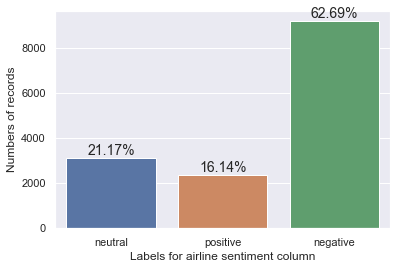

In [9]:
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import plotly.graph_objs as go 
import plotly.offline as py 

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

total_len = len(tweet_dataset['airline_sentiment'])
sns.set()
sns.countplot(tweet_dataset.airline_sentiment)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100 * (height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for airline sentiment column")
ax.set_ylabel("Numbers of records")
plt.show()

#### From the above plot, we can see that the target variable 'airline_sentiment' has a highly imbalanced class distribution of negative, neutral and positive sentiments.

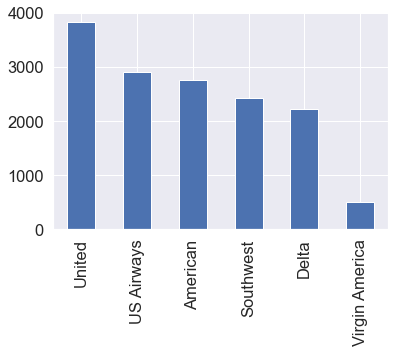

In [10]:
tweet_dataset['airline'].value_counts().plot(kind='bar');

### Removing Duplicates

In [11]:
# Identify duplicates records in the data
duplicates = tweet_dataset[tweet_dataset.duplicated('tweet_id')]
duplicates.shape

(155, 15)

In [12]:
print("Duplicate Rows :") 
duplicates

Duplicate Rows :


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
12040,570308309682675712,negative,1.0000,Customer Service Issue,1.0000,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I even consider continu...,NaN,2015-02-24 11:44:31 -0800,NaN,Quito
12041,570308064185880577,neutral,0.6755,NaN,0.0000,American,NaN,LancasterPattie,NaN,0,@AmericanAir we've already made other arrangem...,NaN,2015-02-24 11:43:32 -0800,NaN,NaN
12042,570307949614256128,negative,1.0000,Can't Tell,1.0000,American,NaN,ELLLORRAC,NaN,0,@AmericanAir thanks for getting back to me. Bu...,NaN,2015-02-24 11:43:05 -0800,NaN,Central Time (US & Canada)
12043,570307948171423745,negative,1.0000,Can't Tell,0.6758,American,NaN,SweeLoTmac,NaN,0,@AmericanAir why would I pay $200 to reactivat...,NaN,2015-02-24 11:43:05 -0800,NaN,Quito
12044,570307434113310720,negative,1.0000,Late Flight,1.0000,American,NaN,LauraMolito,NaN,0,"@AmericanAir stranded for 24 hours in MIA, Pat...",NaN,2015-02-24 11:41:02 -0800,"New York, NY",Atlantic Time (Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,569680231012773888,negative,1.0000,Customer Service Issue,1.0000,American,NaN,LBernieMeyer,NaN,0,@AmericanAir 800 number will not even let you...,NaN,2015-02-22 18:08:45 -0800,NaN,NaN
14386,569622568459636736,negative,1.0000,Customer Service Issue,0.6398,American,NaN,SchrierCar,NaN,0,@AmericanAir I want to speak to a human being!...,NaN,2015-02-22 14:19:38 -0800,NaN,NaN
14392,569621879633391616,negative,1.0000,Customer Service Issue,1.0000,American,NaN,salitron78,NaN,0,@AmericanAir no response to DM or email yet. ...,NaN,2015-02-22 14:16:53 -0800,on @TheJR,Seoul
14543,569601363799359488,negative,1.0000,Flight Attendant Complaints,1.0000,American,NaN,stevereasnors,NaN,0,@AmericanAir should reconsider #usairways acqu...,NaN,2015-02-22 12:55:22 -0800,Los Angeles,Pacific Time (US & Canada)


In [13]:
# Removing Duplicates
tweet_dataset = tweet_dataset.drop_duplicates(subset='tweet_id')
tweet_dataset.shape

(14485, 15)

In [14]:
dupes = tweet_dataset.duplicated('tweet_id')
sum(dupes)

0

In [15]:
tweet_dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [16]:
# Drop all other columns except “text”and “airline_sentiment”
tweet_data = tweet_dataset.loc[:,['text', 'airline_sentiment']]
tweet_data.shape

(14485, 2)

In [17]:
tweet_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [18]:
tweet_data.tail()

,text,airline_sentiment
14635,@AmericanAir thank you we got on a different f...,positive
14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,@AmericanAir Please bring American Airlines to...,neutral
14638,"@AmericanAir you have my money, you change my ...",negative
14639,@AmericanAir we have 8 ppl so we need 2 know h...,neutral


## Noise removal (Special character, html tags, accented characters, punctuation removal)

In [19]:
# First row of data
pd.set_option('display.max_colwidth', None) # It will enable the entire row visible with truncation of the text. (We can see full text.)
tweet_data.loc[[3]]

,text,airline_sentiment
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative


### HTML Tag Removal

In [20]:
# Removal of the http link using Regular Expression
for i, row in tweet_data.iterrows():
    clean_text = re.sub(r"http\S+", "", tweet_data.at[i, 'text'])
    tweet_data.at[i,'text'] = clean_text
tweet_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


### Text Cleaning

In [21]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

# Perform the above operation over all the rows of text column of the dataframe.
for i, row in tweet_data.iterrows():
    text = tweet_data.at[i, 'text']
    clean_text = replace_contractions(text)
    tweet_data.at[i,'text'] = clean_text
tweet_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


In [22]:
def remove_digits(text):
        return re.sub('\d+', '', text)

tweet_data['text'] = tweet_data['text'].apply(lambda x: remove_digits(x))
tweet_data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### Tokenization

In [23]:
# Tokenize the words of whole dataframe.
for i, row in tweet_data.iterrows():
    text = tweet_data.at[i, 'text']
    words = nltk.word_tokenize(text)
    tweet_data.at[i,'text'] = words
tweet_data.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, amp, ;, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [24]:
# Save the stopwords in a list named stopwords.
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [26]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [27]:
def remove_digits(words):
    new_words = []                        
    for word in words:
        new_word = re.sub('\d+', '', word)
        new_words.append(new_word)
        return new_words

### Lowercasing

In [28]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

### Stopword Removal

In [29]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)        # Append processed words to new list.
    return new_words

### Stemming

In [30]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

### Lemmatization

In [31]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

### Text Pre-Processing

In [32]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_verbs(words)
    return ' '.join(words)

In [33]:
# Iterate the normalize funtion over whole data.
for i, row in tweet_data.iterrows():
    words = tweet_data.at[i, 'text']
    words = normalize(words)
    tweet_data.at[i,'text'] = words
tweet_data.head()

,text,airline_sentiment
0,virginamerica dhepburn say,neutral
1,virginamerica plus add commercials experience tacky,positive
2,virginamerica today must mean need take another trip,neutral
3,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse,negative
4,virginamerica really big bad thing,negative


In [34]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14485 entries, 0 to 14639
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   text               14485 non-null  object
 1   airline_sentiment  14485 non-null  object
dtypes: object(2)
memory usage: 979.5+ KB


In [35]:
tweet_data.loc[:,'label'] = tweet_data.airline_sentiment.map({'negative':0,'neutral':2,'positive':1})
tweet_data.head()

,text,airline_sentiment,label
0,virginamerica dhepburn say,neutral,2
1,virginamerica plus add commercials experience tacky,positive,1
2,virginamerica today must mean need take another trip,neutral,2
3,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse,negative,0
4,virginamerica really big bad thing,negative,0


In [36]:
tweet_data = tweet_data.drop(['airline_sentiment'], axis=1)
tweet_data.head()

,text,label
0,virginamerica dhepburn say,2
1,virginamerica plus add commercials experience tacky,1
2,virginamerica today must mean need take another trip,2
3,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse,0
4,virginamerica really big bad thing,0


In [37]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

y = tweet_data['label']
y = y.astype('int')
X = tweet_data[['text']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y,random_state=42)

In [38]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(10139, 1) (10139,)
(4346, 1) (4346,)


#### Vectorization

<ul>
    Use 3000 most frequently occuring words to create the bag of words (max_features)
</ul>

### Logistic Regression with BOW/Count Vectorizer

In [39]:
# Bow/ Count Vectorization (Convert text data to numbers)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)            
vectorizer.fit(X_train['text'])
 
X_train_bow = vectorizer.transform(X_train['text'].values)
X_test_bow = vectorizer.transform(X_test['text'].values)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(10139, 3000) (10139,)
(4346, 3000) (4346,)


In [40]:
# Convert the data features to array.
X_train_bow=X_train_bow.toarray()
X_test_bow=X_test_bow.toarray()

#### Oversample imbalanced target attribute with SMOTE

In [41]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# transform the column
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('over', oversample), ('under', undersample)]
pipeline = Pipeline(steps=steps)
X_train_bow, y_train_bow = pipeline.fit_resample(X_train_bow, y_train)

In [42]:
# summarize the new class distribution

print(X_train_bow.shape)
print(y_train_bow.shape)

(19071, 3000)
(19071,)


In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,roc_curve
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
logreg_c = logreg.fit(X_train_bow, y_train_bow)
print(np.mean(cross_val_score(logreg_c, X_train_bow, y_train_bow, cv=10)))

0.7600024295352332


In [44]:
result_c = logreg_c.predict(X_test_bow)

[[2282  127  316]
 [ 117  488   95]
 [ 247  109  565]]


<AxesSubplot:>

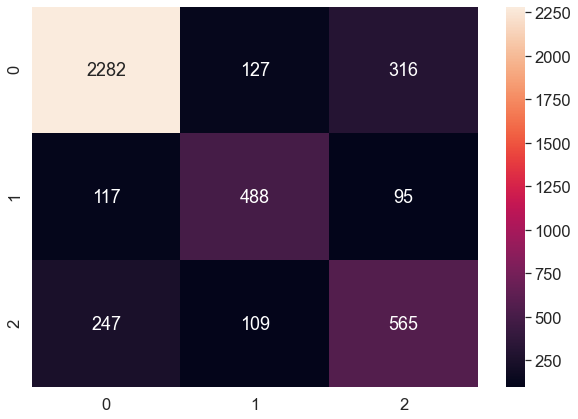

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,recall_score,roc_curve

conf_mat_c = confusion_matrix(y_test, result_c)
print(conf_mat_c)
df_cm = pd.DataFrame(conf_mat_c, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [46]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,result_c))
print("\nLogistic Regression Count Vectors Accuracy:",accuracy_score(y_test, result_c)*100, '%')

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2725
           1       0.67      0.70      0.69       700
           2       0.58      0.61      0.60       921

    accuracy                           0.77      4346
   macro avg       0.71      0.72      0.71      4346
weighted avg       0.77      0.77      0.77      4346


Logistic Regression Count Vectors Accuracy: 76.73722963644731 %


### Logistic Regression with TF-IDF N-gram level Vectorizer

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(10139, 1) (10139,)
(4346, 1) (4346,)


In [48]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = "word",max_features=3000)
vectorizer.fit(X_train['text'])

X_train_tfidf = vectorizer.transform(X_train['text'].values)
X_test_tfidf = vectorizer.transform(X_test['text'].values)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(10139, 3000) (10139,)
(4346, 3000) (4346,)


In [49]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

#### Oversample imbalanced target attribute with SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# transform the column
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('over', oversample), ('under', undersample)]
pipeline = Pipeline(steps=steps)
X_train_tfidf, y_train_tfidf = pipeline.fit_resample(X_train_tfidf, y_train)

In [51]:
# Summarize the new class distribution
print(X_train_tfidf.shape)
print(y_train_tfidf.shape)

(19071, 3000)
(19071,)


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,recall_score,roc_curve
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression()
logreg_tf = logreg.fit(X_train_tfidf, y_train_tfidf)
print(np.mean(cross_val_score(logreg_tf, X_train_tfidf, y_train_tfidf, cv=10)))

0.8502959965436838


In [53]:
result_tf = logreg_tf.predict(X_test_tfidf)

[[2238  123  364]
 [  87  493  120]
 [ 234  100  587]]


<AxesSubplot:>

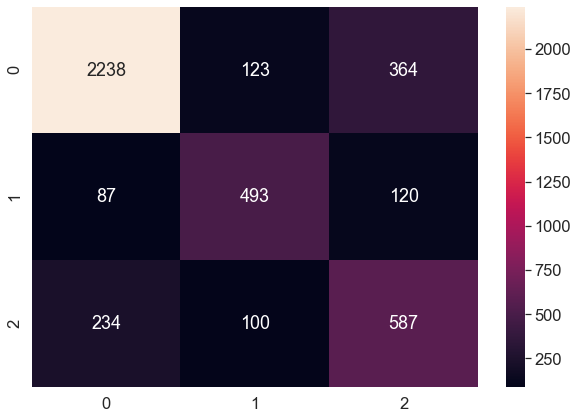

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,recall_score,roc_curve

conf_mat_tf = confusion_matrix(y_test, result_tf)
print(conf_mat_tf)
df_cm = pd.DataFrame(conf_mat_tf, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [55]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,result_tf))
print("\nLogistic Regression TF-IDF N-gram Level Vectors Accuracy:",accuracy_score(y_test, result_c)*100, '%')

              precision    recall  f1-score   support

           0       0.87      0.82      0.85      2725
           1       0.69      0.70      0.70       700
           2       0.55      0.64      0.59       921

    accuracy                           0.76      4346
   macro avg       0.70      0.72      0.71      4346
weighted avg       0.78      0.76      0.77      4346


Logistic Regression TF-IDF N-gram Level Vectors Accuracy: 76.73722963644731 %


### Naive Byes with Count Vectorizer

In [56]:
# Bow/ Count Vectorization (Convert text data to numbers)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)            
vectorizer.fit(X_train['text'])
 
X_train_bow = vectorizer.transform(X_train['text'].values)
X_test_bow = vectorizer.transform(X_test['text'].values)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(10139, 3000) (10139,)
(4346, 3000) (4346,)


In [57]:
# Convert the data features to array.
X_train_bow=X_train_bow.toarray()
X_test_bow=X_test_bow.toarray()

#### Oversample imbalanced target attribute with SMOTE

In [58]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# transform the column
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('over', oversample), ('under', undersample)]
pipeline = Pipeline(steps=steps)
X_train_bow, y_train_bow = pipeline.fit_resample(X_train_bow, y_train)

In [59]:
# Summarize the new class distribution
print(X_train_bow.shape)
print(y_train_bow.shape)

(19071, 3000)
(19071,)


In [60]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score

nb = MultinomialNB(alpha=1)
nb_c = nb.fit(X_train_bow, y_train_bow)
print(np.mean(cross_val_score(nb_c, X_train_bow, y_train_bow, cv=10)))

0.7269675387708749


In [61]:
result_c = nb_c.predict(X_test_bow)

[[2341  128  256]
 [ 121  478  101]
 [ 294  122  505]]


<AxesSubplot:>

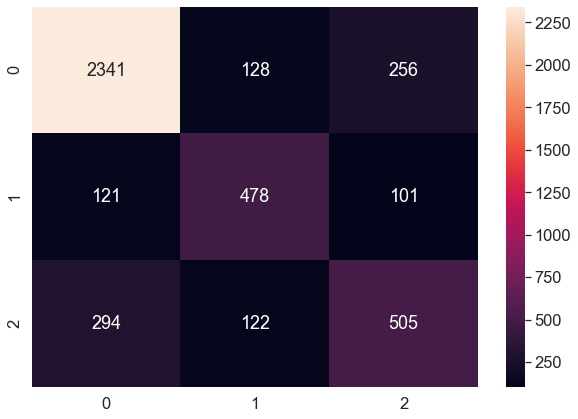

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,recall_score,roc_curve

conf_mat_c = confusion_matrix(y_test, result_c)
print(conf_mat_c)
df_cm = pd.DataFrame(conf_mat_c, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [63]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,result_c))
print("\nNaive Bayes Count Vectors Accuracy:",accuracy_score(y_test, result_c)*100, '%')

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      2725
           1       0.66      0.68      0.67       700
           2       0.59      0.55      0.57       921

    accuracy                           0.76      4346
   macro avg       0.70      0.70      0.70      4346
weighted avg       0.76      0.76      0.76      4346


Naive Bayes Count Vectors Accuracy: 76.48412333179935 %


### Naive Bayes with TF-IDF Word Level Vectorizer

In [64]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(10139, 1) (10139,)
(4346, 1) (4346,)


In [65]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer = "word",max_features=3000)
vectorizer.fit(X_train['text'])

X_train_tfidf = vectorizer.transform(X_train['text'].values)
X_test_tfidf = vectorizer.transform(X_test['text'].values)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(10139, 3000) (10139,)
(4346, 3000) (4346,)


In [66]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

#### Oversample imbalanced target attribute with SMOTE

In [67]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# transform the column
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('over', oversample), ('under', undersample)]
pipeline = Pipeline(steps=steps)
X_train_tfidf, y_train_tfidf = pipeline.fit_resample(X_train_tfidf, y_train)

In [68]:
# summarize the new class distribution
print(X_train_tfidf.shape)
print(y_train_tfidf.shape)

(19071, 3000)
(19071,)


In [69]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import cross_val_score

nb = MultinomialNB(alpha=1)
nb_tfidf_w = nb.fit(X_train_tfidf, y_train_tfidf)
print(np.mean(cross_val_score(nb_tfidf_w, X_train_tfidf, y_train_tfidf, cv=10)))

0.8112843666553434


In [70]:
result_tf_w = nb_tfidf_w.predict(X_test_tfidf)

[[2231  172  322]
 [  95  495  110]
 [ 260  133  528]]


<AxesSubplot:>

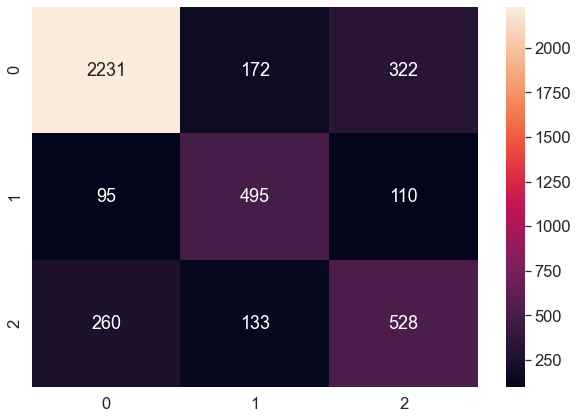

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

conf_mat_tf_w = confusion_matrix(y_test, result_tf_w)
print(conf_mat_tf_w)
df_cm = pd.DataFrame(conf_mat_tf_w, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [72]:
print(classification_report(y_test,result_tf_w))
print("\nNaive Bayes TF_IDF Word level Accuracy:",accuracy_score(y_test, result_tf_w)*100, '%')

              precision    recall  f1-score   support

           0       0.86      0.82      0.84      2725
           1       0.62      0.71      0.66       700
           2       0.55      0.57      0.56       921

    accuracy                           0.75      4346
   macro avg       0.68      0.70      0.69      4346
weighted avg       0.76      0.75      0.75      4346


Naive Bayes TF_IDF Word level Accuracy: 74.87344684767604 %


### Naive Bayes with TFIDF N-gram level Vectorizer

In [73]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(10139, 1) (10139,)
(4346, 1) (4346,)


In [74]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True,min_df=2,max_df=0.5,max_features=3000,ngram_range=(1,2))
vectorizer.fit(X_train['text'])

X_train_tfidf = vectorizer.transform(X_train['text'].values)
X_test_tfidf = vectorizer.transform(X_test['text'].values)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(10139, 3000) (10139,)
(4346, 3000) (4346,)


In [75]:
X_train_tfidf = X_train_tfidf.toarray()
X_test_tfidf = X_test_tfidf.toarray()

#### Oversample imbalanced target attribute with SMOTE

In [76]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# transform the column
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('over', oversample), ('under', undersample)]
pipeline = Pipeline(steps=steps)
X_train_tfidf, y_train_tfidf = pipeline.fit_resample(X_train_tfidf, y_train)

In [77]:
# summarize the new class distribution

print(X_train_tfidf.shape)
print(y_train_tfidf.shape)

(19071, 3000)
(19071,)


In [78]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

nb = MultinomialNB(alpha=1)
nb_tfidf_n = nb.fit(X_train_tfidf, y_train_tfidf)
print(np.mean(cross_val_score(nb_tfidf_n, X_train_tfidf, y_train_tfidf, cv=10)))

0.8206700954994235


In [79]:
result_tf_n = nb_tfidf_n.predict(X_test_tfidf)

[[2192  194  339]
 [  82  511  107]
 [ 237  116  568]]


<AxesSubplot:>

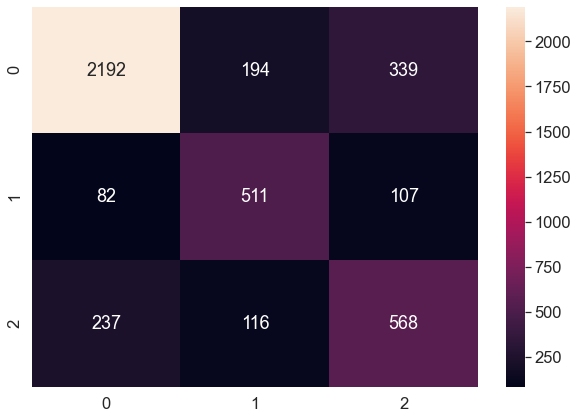

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

conf_mat_tf_n = confusion_matrix(y_test, result_tf_n)
print(conf_mat_tf_n)
df_cm = pd.DataFrame(conf_mat_tf_n, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [81]:
print(classification_report(y_test,result_tf_n))
print("\nNaive Bayes TF-IDF N-gram level Accuracy:",accuracy_score(y_test, result_tf_n)*100, '%')

              precision    recall  f1-score   support

           0       0.87      0.80      0.84      2725
           1       0.62      0.73      0.67       700
           2       0.56      0.62      0.59       921

    accuracy                           0.75      4346
   macro avg       0.69      0.72      0.70      4346
weighted avg       0.77      0.75      0.76      4346


Naive Bayes TF-IDF N-gram level Accuracy: 75.2646111366774 %


<ul>
    <li>sublinear_df is set to True to use a logarithmic form for frequency</li>
    <li>min_df is the minimum numbers of documents a word must be present in to be kept</li>
    <li>max_df: When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    <li>ngram_range is set to (1, 2) to indicate that we want to consider unigrams and bigrams</li>
</ul>

### Random Forest with Count Vectorizer

In [82]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(10139, 1) (10139,)
(4346, 1) (4346,)


In [83]:
# Bow/ Count Vectorization (Convert text data to numbers)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)            
vectorizer.fit(X_train['text'])
 
X_train_bow = vectorizer.transform(X_train['text'].values)
X_test_bow = vectorizer.transform(X_test['text'].values)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(10139, 3000) (10139,)
(4346, 3000) (4346,)


In [84]:
# Convert the data features to array.
X_train_bow=X_train_bow.toarray()
X_test_bow=X_test_bow.toarray()

#### Oversample imbalanced target attribute with SMOTE

In [85]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# transform the column
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('over', oversample), ('under', undersample)]
pipeline = Pipeline(steps=steps)
X_train_bow, y_train_bow = pipeline.fit_resample(X_train_bow, y_train)

In [86]:
# summarize the new class distribution

print(X_train_bow.shape)
print(y_train_bow.shape)

(19071, 3000)
(19071,)


In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


forest = RandomForestClassifier(n_estimators=400,n_jobs=4,random_state=42)
forest_c = forest.fit(X_train_bow, y_train_bow)
print(forest_c)
print(np.mean(cross_val_score(forest_c, X_train_bow, y_train_bow, cv=10)))

RandomForestClassifier(n_estimators=400, n_jobs=4, random_state=42)
0.7531851096973634


In [88]:
result_c = forest_c.predict(X_test_bow)

[[2209  178  338]
 [ 143  444  113]
 [ 288  166  467]]


<AxesSubplot:>

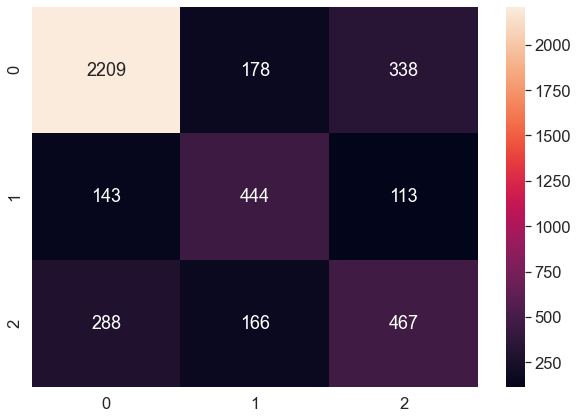

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score

conf_mat_c = confusion_matrix(y_test, result_c)
print(conf_mat_c)
df_cm = pd.DataFrame(conf_mat_c, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [90]:
from sklearn.metrics import classification_report,accuracy_score

print(classification_report(y_test,result_c))
print("\nRandom Forest Count Vectors Accuracy:",accuracy_score(y_test, result_c)*100, '%')

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      2725
           1       0.56      0.63      0.60       700
           2       0.51      0.51      0.51       921

    accuracy                           0.72      4346
   macro avg       0.64      0.65      0.64      4346
weighted avg       0.72      0.72      0.72      4346


Random Forest Count Vectors Accuracy: 71.7901518637828 %


### Random Forest with TFIDF Vectorizer

In [91]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(10139, 1) (10139,)
(4346, 1) (4346,)


In [92]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True,max_features=3000,min_df=2,max_df=0.5,ngram_range=(1,2))
vectorizer.fit(X_train['text'])

X_train_tfidf = vectorizer.transform(X_train['text'].values)
X_test_tfidf = vectorizer.transform(X_test['text'].values)
print("After vectorizations")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(10139, 3000) (10139,)
(4346, 3000) (4346,)


In [93]:
X_train_tfidf=X_train_tfidf.toarray()
X_test_tfidf=X_test_tfidf.toarray()

#### Oversample imbalanced target attribute with SMOTE

In [94]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# transform the column
oversample = SMOTE()
undersample = RandomUnderSampler()
steps = [('over', oversample), ('under', undersample)]
pipeline = Pipeline(steps=steps)
X_train_tfidf, y_train_tfidf = pipeline.fit_resample(X_train_tfidf, y_train)

In [95]:
# summarize the new class distribution

print(X_train_tfidf.shape)
print(y_train_tfidf.shape)

(19071, 3000)
(19071,)


In [96]:
forest = RandomForestClassifier(n_estimators=400, n_jobs=4,random_state=42)
forest_tf = forest.fit(X_train_tfidf, y_train_tfidf)
print(forest_tf)
print(np.mean(cross_val_score(forest_tf, X_train_tfidf, y_train_tfidf, cv=10)))

RandomForestClassifier(n_estimators=400, n_jobs=4, random_state=42)
0.8944992464043429


In [97]:
result_tf = forest_tf.predict(X_test_tfidf)

[[2356  116  253]
 [ 156  436  108]
 [ 359   86  476]]


<AxesSubplot:>

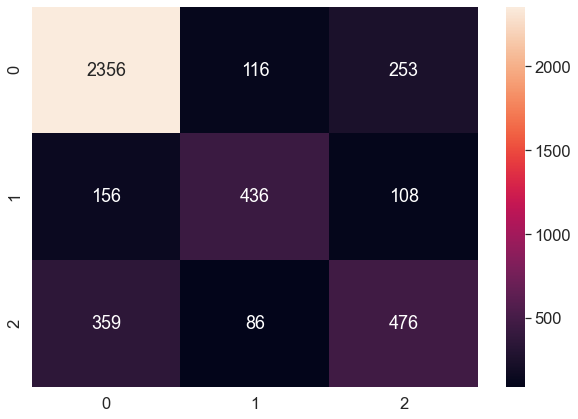

In [98]:
conf_mat_tf = confusion_matrix(y_test, result_tf)
print(conf_mat_tf)
df_cm = pd.DataFrame(conf_mat_tf, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [99]:
print(classification_report(y_test,result_tf))
print("\n Random Forest TF-IDF N-gram Level Accuracy:",accuracy_score(y_test, result_tf)*100, '%')

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      2725
           1       0.68      0.62      0.65       700
           2       0.57      0.52      0.54       921

    accuracy                           0.75      4346
   macro avg       0.69      0.67      0.68      4346
weighted avg       0.75      0.75      0.75      4346


 Random Forest TF-IDF N-gram Level Accuracy: 75.19558214450069 %


### Neural Networks

In [100]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print("="*100)

(10139, 1) (10139,)
(4346, 1) (4346,)


In [101]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [102]:
tweet_data.head()

,text,label
0,virginamerica dhepburn say,2
1,virginamerica plus add commercials experience tacky,1
2,virginamerica today must mean need take another trip,2
3,virginamerica really aggressive blast obnoxious entertainment guests face amp little recourse,0
4,virginamerica really big bad thing,0


In [103]:
sentences = tweet_data['text'].values 
labels = tweet_data['label']
labels = labels.astype('int')

In [104]:
x_train,x_test,y_train,y_test = train_test_split(sentences,labels,test_size = 0.3,random_state = 42)

In [105]:
vocab_size = 3000
embedding_dim = 16 
max_length = 120 
trunc_type = 'post'
oov_tok = "<OOV>"

In [106]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index 
sequences = tokenizer.texts_to_sequences(x_train)
padded = pad_sequences(sequences= sequences,maxlen=max_length,truncating=trunc_type)

In [107]:
testing_sequences = tokenizer.texts_to_sequences(x_test)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [108]:
reverse_word_index = dict([(value,key)for (key,value) in word_index.items()])

In [109]:
def decode_review(text):
  return " ".join([reverse_word_index.get(i,'?') for i in text])

In [110]:
print(decode_review(padded[0]))
print(x_train[0])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? americanair yep move show fly standby
americanair yep move show fly standby


In [111]:
model = tensorflow.keras.Sequential([
             tensorflow.keras.layers.Embedding(vocab_size,embedding_dim,input_length=max_length), 
             tensorflow.keras.layers.Flatten(), 
             tensorflow.keras.layers.Dropout(0.5),
             tensorflow.keras.layers.Dense(12, activation='relu'),
             tensorflow.keras.layers.Dropout(0.5),
             tensorflow.keras.layers.Dense(3, activation='softmax')])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           48000     
_________________________________________________________________
flatten (Flatten)            (None, 1920)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1920)              0         
_________________________________________________________________
dense (Dense)                (None, 12)                23052     
_________________________________________________________________
dropout_1 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 39        
Total params: 71,091
Trainable params: 71,091
Non-trainable params: 0
____________________________________________________

In [112]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.fit(padded,y_train, batch_size = 64,epochs = 10)

Epoch 1/10
159/159 [==============================] - 1s 3ms/step - loss: 0.9873 - accuracy: 0.5711
Epoch 2/10
159/159 [==============================] - 0s 2ms/step - loss: 0.8953 - accuracy: 0.6214
Epoch 3/10
159/159 [==============================] - 0s 2ms/step - loss: 0.8016 - accuracy: 0.6214
Epoch 4/10
159/159 [==============================] - 0s 2ms/step - loss: 0.7365 - accuracy: 0.6536
Epoch 5/10
159/159 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.6862
Epoch 6/10
159/159 [==============================] - 0s 2ms/step - loss: 0.6317 - accuracy: 0.7454
Epoch 7/10
159/159 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7756
Epoch 8/10
159/159 [==============================] - 0s 2ms/step - loss: 0.5514 - accuracy: 0.7937
Epoch 9/10
159/159 [==============================] - 0s 2ms/step - loss: 0.5296 - accuracy: 0.7986
Epoch 10/10
159/159 [==============================] - 0s 2ms/step - loss: 0.5096 - accuracy: 0.8027

In [113]:
# Score trained model

score = model.evaluate(testing_padded, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5558000206947327
Test accuracy: 0.7768062353134155


## Summary

Used a dataset which has reviews in text format and the sentiments of the reviews rated as positive,negative or neutral.The goal was to build a model for text-classification.
Pre-processed the data using various techniques and libraries. The pre-precessed data is then converted to numbers, so that it can be fed to the model and then treated the imbalance in the target attribute using SMOTE techinques. After building the classification model, we predicted the result for the test data.

Plotted confusion matrices for predicted sentiments and actual sentiments (negative as 0,neutral as 2  and positive as 1).The confusion matrix shows the TP,TN,FP,FN for all the 3 sentiments(negative,neutral and positive)

According to the classification report,Logistic Regression and Naive Bayes classifiers with Count Vectorizer  give us the best accuracy score, precision and recall scores and gives better results than the Random Forest Classifier.

However, we can still improve the performance of text classifier and increase the accuracy of the model using some of the approaches such as:
<ul>
    <li>Stacking Text / NLP features with text feature vectors :  Combining the different feature vectors created  can help to improve the accuracy of the classifier.
        Other feature engineering techniques like  word embeddings and creating extra text based features (such as Word Count,Character Count, and Average Word Density of the documents, Frequency distribution of Part of Speech Tags like noun count,verb count,adjective count etc) sometimes are helpful for improving text classification models</li>
<li>Hyperparamter Tuning in modelling : Tuning the paramters is an important step, a number of parameters such as tree length, leafs, network paramters etc can be fine tuned to get a best fit model.</li>
<li>Ensemble Models : Stacking different models and blending their outputs can help to further improve the results.</li>
</ul>